# References

* [CS231n: Convolutional Neural Networks for Visual Recognition 2017](http://cs231n.stanford.edu/2017/syllabus)
    - [cs231n 2017 assignment #1 kNN, SVM, SoftMax, two-layer network](https://cs231n.github.io/assignments2017/assignment1/)
    - [Training a Softmax Linear Classifier](https://cs231n.github.io/neural-networks-case-study)
* [ゼロから作る Deep Learning](https://github.com/oreilly-japan/deep-learning-from-scratch)
* [Mathematics for Machine Learning](https://mml-book.github.io/)

# Neural network 
Simple one layer neural network classifier. Mathjax formula not fully supported in github, hence the formulas get corrupted.

<img src="image/nn_diagram.png" align="left">

<img src="image/nn_functions.png" align="left">

# Setup

In [2]:
from typing import (
    Optional,
    Union,
    List,
    Dict,
    Tuple
)

## Python path
Python path setup to avoid the relative imports.

In [4]:
import sys
import os 

## Package dependencies

In [5]:
from typing import (
    Union,
    List,
    Callable
)
import inspect
from functools import partial
import logging
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=80) 

## Jupyter notebook

In [6]:
#!conda install line_profile memory_profiler
%load_ext memory_profiler
%load_ext line_profiler

# %matplotlib notebook
%matplotlib inline

## Network geometry

In [6]:
N = 1    # Batch size
D = 3    # Number of features in the input data
M = 2    # Number of nodes in a layer

---

# Confiurations 

## X
X is to have been standardized. 

## T
Labels for data X.

### For One Hot Encoding labels
$
\begin{align*}
\overset{ (N,M) }{ T_{_{OHE}} } &= ( 
    \overset{ (M,) }{ T_{(n=0)} }, \; \dots \;, \overset{ (M,) }{ T_{(n=N-1)} } 
) 
\\
\overset{ (N,M) }{ T_{_{OHE}} } = ( 
    \overset{ (M,) }{ T_{(n=0)} }, \dots , \overset{ (M,) }{ T_{(n=N-1)} } 
) 
\\
\overset{ (M,) }{ T_{ _{OHE} (n)} } &= ( \overset{ () }{ t_{(n)(m=0)} }, \; \dots \;, \overset{ () }{ t_{(n)(m=M-1)} })
\end{align*}
$

### For index labels
$
\begin{align*}
\overset{ (N,) }{ T_{_{IDX}} } &= (\overset{ () }{ t_{(n=0)} }, \; \dots \;, \overset{ () }{ t_{(n=N-1)} }) \qquad \text {for index labels }
\end{align*}
$

## W
Weight parameters.

In [7]:
from common import (
    xavier,
    he,
    uniform
)

---

# Normalization Layer
Apply normalization or use batch normaliation.

---

# Matmul layer

In [8]:
from layer.matmul import Matmul

## Objective Function
$
\begin{align*}
\overset{ (N,M) }{ Y } 
&= 
\begin{bmatrix}
{ Y_{(n=0)} } \\
\vdots \\
{ Y_{(n)} } \\
\vdots \\
{ Y_{(n=N-1)} }
\end{bmatrix}
=
\overset{ (N,D) }{ X } \; @ \; \overset{ (D,M) }{ W^T }
\\
\\
\overset{ (M,) }{ Y_{(n)} } &= (y_{(n)(m=0)}, \; \dots, \; y_{(n)(m)},  \; \dots, \; y_{(n)(m=M-1)})
\\
\overset{ () }{ y_{(n)(m)} }
&= \overset{ (D,) }{ X_{(n)} } \cdot \overset{ (D,) }{ W_{(m)}^T }
= \sum\limits ^{D}_{d=0}  \overset{ () }{ x_{(n)(d)} } * \overset{ () }{ w_{(m)(d)} }
\\
_{(0 \le d \le D, \; 0 \le n \lt N, \; 0 \le m \lt M)}
\end{align*}
$

## Gradient dL/dX

Impact on L by $dX$.

$
\begin{align*}
\overset { (N,D) }{ \frac {\partial L }{ \partial X } }
= \overset { (N,M) }{ \frac {\partial L}{\partial Y} }
@ \overset { (M,D) }{ W } 
\end{align*}
$
<img src="image/nn_back_propagation_dL_dX.png" align="left" />

## Gradient dL/dW.T
Impact on L by $dW^T$.

$
\begin{align*}
\overset { (N,M) }{ \frac {\partial L }{ \partial W^T } }
= \overset { (D,N) }{ X^T } 
@ 
\overset { (N,M) }{ \frac {\partial L}{\partial Y} }
\end{align*}
$

<img src="image/nn_back_propagation_dL_dWT.png" align="left" />

---

# Activation layer

## Objective function
$
\begin{align*}
\overset{ (N,M) }{ A } &= 
activation \left( 
    \overset{ (N,M) }{ Y }  = 
    \begin{bmatrix}
    { Y_{(n=0)} } \\
    \vdots \\
    { Y_{(n)} } \\
    \vdots \\
    { Y_{(n=N-1)} }
    \end{bmatrix}
\right)
\\
\overset{ (M,) }{ A_{(n)} } 
&= activation \left( \overset{ (M,) }{ Y_{(n) }} \right)  \\
&= (a_{(n)(m=0)}, \; \dots, \; a_{(n)(m)},  \; \dots, \; a_{(n)(m=M-1)})
\\
\overset{ () }{ a_{(n)(m)} } &= activation \left( \overset{ () }{ y_{(n)(m)} } \right)
\quad _{(0 \le n \lt N, \; 0 \le m \lt M)}
\end{align*}
$

## Gradient dL/dY

Impact on L by dY from the matmul layer.

$
\begin {align*}
\overset { (N,M) }{ \frac {\partial L }{ \partial Y } }
= \overset { (N,M) }{ \frac {\partial L}{\partial A} } 
* 
\overset { (N,M) }{ \frac {\partial A}{\partial Y} }
\end {align*}
$

### For sigmoid activation

$
\begin{align*}
\overset {(N,M)}{\frac { \partial L }{ \partial Y} }
&= \frac { \partial A }{ \partial Y} * A * (1 - A)
\\
\frac { \partial y_{(n)(m)} } { \partial a_{(n)(m)} }
&= a_{(n)(m)} * (1 - a_{(n)(m)} )  \\ 
y_{(n)(m)} = sigmoid(a_{(n)(m)} )&=  \frac {1}{ 1 + exp(y_{(n)(m)})}
\end{align*}
$

### For ReLU activation

$
\begin{align*}
\frac { \partial a_{(n)(m)} }{ \partial y_{(n)(m)} }
&= 1 \quad y_{(n)(m)}  \gt 0 \\
&= 0 \quad y_{(n)(m)}  \le 0 \\
\end{align*}
$

---

# Softmax layer
$C_n$ is to prevent the overflow at $np.exp()$.

<img src="image/softmax.png" align="left" width=400/>

exp(x) can take all x values and produces a positive, which is required for log(y) that needs y > 0, hence fit-for-purpose to build a probability function.

<img src="image/exp.gif" align="left" width=250/>

Softmax and Cross Entropy Log Loss are combined as the gradient results in a simple form $P - T$.

In [9]:
from layer import CrossEntropyLogLoss
from common import softmax

lines = inspect.getsource(softmax)
print(lines)

def softmax(X: Union[np.ndarray, float]) -> Union[np.ndarray, float]:
    """Softmax P = exp(X) / sum(exp(X))
    Args:
        X: batch input data of shape (N,M).
            N: Batch size
            M: Number of nodes
    Returns:
        P: Probability of shape (N,M)
    """
    name = "softmax"
    assert isinstance(X, float) or (isinstance(X, np.ndarray) and X.dtype == float), \
        "X must be float or ndarray(dtype=float)"

    # --------------------------------------------------------------------------------
    # exp(x-c) to prevent the infinite exp(x) for a large value x, with c = max(x).
    # keepdims=True to be able to broadcast.
    # --------------------------------------------------------------------------------
    C = np.max(X, axis=-1, keepdims=True)
    exp = np.exp(X - C)
    P = exp / np.sum(exp, axis=-1, keepdims=True)
    Logger.debug("%s: X %s exp %s P %s", name, X, exp, P)

    return P



## Objective function
$
\begin{align*}
\overset{ (N,1) }{ C } &= np.max\left( 
    \overset{ (N,M) }{ A }, \; axis=-1,  \; keepdim=True 
\right) \\
&=  
\begin{bmatrix}
    \begin{bmatrix} \overset{ () }{ c_{(n=0  )} } \end{bmatrix} \\
    \begin{bmatrix} \overset{ () }{ c_{(n    )} } \end{bmatrix} \\
    \begin{bmatrix} \overset{ () }{ c_{(n=N-1)} } \end{bmatrix}
\end{bmatrix} 
\\
\overset{ (N,M) }{ EXP } &= np.exp \left( \overset{ (N,M) }{ A } - \overset{ (N,1) }{ C } \right)
= np.exp \left(
    \begin{bmatrix}
    { A_{(n=0)} } - { C_{(n=0)} }\\
    \vdots \\
    { A_{(n)} }   - { C_{(n)} }\\
    \vdots \\
    { A_{(n=N-1)} } - { C_{(n=N-1)} }\\
    \end{bmatrix}
\right) 
\\
&= 
\begin{bmatrix}
    e_{(n=0)(m=0)}   & \dots      & e_{(n=0)(m=M-1)}   \\  
    \vdots           & e_{(n)(m)} & \vdots             \\
    e_{(n=N-1)(m=0)} & \dots      & e_{(n=N-1)(m=M-1)} 
\end{bmatrix} 
\\
\\
\overset{ (N,1) }{ S } &= \overset{ (N,1) }{ sum(EXP) } = np.sum \left( 
    \overset{ (N,M) }{ EXP }, \; axis=-1,  \; keepdim=True 
\right)
\\
&= 
\begin{bmatrix}
    \begin{bmatrix} \overset{ () }{ s_{(n=0  )} } \end{bmatrix} \\
    \begin{bmatrix} \overset{ () }{ s_{(n    )} } \end{bmatrix} \\
    \begin{bmatrix} \overset{ () }{ s_{(n=N-1)} } \end{bmatrix}
\end{bmatrix} 
\\
\overset{ () }{ s_{(n)} } &= \sum\limits ^{M-1}_{m=0} np.exp(\; a_{(n)(m)} - c_{(n)} \; )
\\
\\
\overset{ (N,M) }{ P } &= \overset{ (N,M) }{ EXP }  \;\; / \;\; \overset{ (N,1) }{ sum(EXP) } 
\\
\overset{ (N,) }{ P_{(n)} } &= (p_{(n)(m=0)}, \; \dots, \; p_{(n)(m)} , \; \dots, \; p_{(n)(m=M-1)})
\\
{ p_{(n)(m)} } 
&= \frac {np.exp \left( 
    { a_{(n)(m) } } - { c_{(n)} }) \right) 
}
{  
np.sum \left( 
    np.exp \left( 
        a_{(n)(m) } - c_{(n)}
    \right)
\right) 
}
\end{align*}
$

## Gradient dL/dA

Impact on L by dA from the activation layer.

$
\begin{align*}
\overset { (N,M) }{ \frac {\partial L }{\partial A} }
= \overset { (N,M) }{ \frac {\partial L}{\partial P} }
* 
\overset { (N,M) }{ \frac {\partial P }{\partial A} } 
= 
\frac {1}{N} (P - T)
\end{align*}
$

$
Jacobian \; : \; f \circ g \rightarrow Jf \circ Jg
\\
\begin{align*}
\\
L &= f(\; p_{(n)(m=0)} \;) = f( \; g(\;  a_{(n)(m=0)} \; ) \; ) \quad : p = g(a) = softmax(a)
\\
\frac {\partial L} { \partial a_{(n)(m=0)} }
&= Jf(p) \circ Jg(a) 
=  \frac {\partial L} { \partial p_{(n)(m=0)} } * \frac {\partial  p_{(n)(m=0)}} { \partial a_{(n)(m=0)} }
\\
&= \frac {1}{N} \left(
 p_{(n)(m=0)} -t_{(n)(m=0)}
\right)
\end{align*}
$

### Gradient from cross entropy log loss

$
\begin{align*}
\frac { \partial L }{ \partial  p_{(n)(m=0)} }
&= \frac{-1}{N} t_{(n)(m=0)} * \frac {s_{(n)}}{e_{(n)(m=0)}}
\\
\frac { \partial L }{ \partial  p_{(n)(m=1)} } 
&= \frac{-1}{N} t_{(n)(m=1)} * \frac {s_{(n)}}{e_{(n)(m=1)}}
\end{align*}
$


###  Gradient $\frac { \partial  L } { \partial s^{-1}_{(n)} } $

$
\begin{align*}
p_{(n)(m=0)} &= \frac {e_{(n)(m=0)} }{ s_{(n)} } \\
p_{(n)(m=0)} &= f \circ g_{(m=0)} = { s^{-1}_{(n)} } \; * \; { e_{(n)(m=0)} }
\rightarrow \frac { \partial  p_{(n)(m=0)} } { \partial s^{-1}_{(n)} } = e_{(n)(m=0)}
\\
p_{(n)(m=1)} &= \frac {e_{(n)(m=1)} }{ s_{(n)} } \\
p_{(n)(m=1)} &= f \circ g_{(m=1)} = { s^{-1}_{(n)} } \; * \; { e_{(n)(m=1)} }
\rightarrow \frac { \partial  p_{(n)(m=1)} } { \partial s^{-1}_{(n)} } = e_{(n)(m=1)}
\\
\frac { \partial  L } { \partial s^{-1}_{(n)} } 
&=
\left[
    \frac { \partial  p_{(n)(m=0)} } { \partial s^{-1}_{(n)} } * 
    \frac { \partial L }{ \partial  p_{(n)(m=0)} } 
    +
    \frac { \partial  p_{(n)(m=1)} } { \partial s^{-1}_{(n)} } * 
    \frac { \partial L }{ \partial  p_{(n)(m=1)} } 
\right]
\\
&= \sum\limits^{M-1}_{m=0} 
    e_{(n)(m)}  * \frac { \partial L }{ \partial  p_{(n)(m)} } 
\\
\\
\frac { \partial  L } { \partial s^{-1}_{(n)} } 
&=
    \begin{bmatrix}
    e_{(n)(m=0)}  * \frac { \partial L }{ \partial  p_{(n)(m=0)} } \\
    + \\
    e_{(n)(m=1)}  * \frac { \partial L }{ \partial  p_{(n)(m=1)} } 
    \end{bmatrix}
\\
&= -s_{(n)}(\; t_{(n)(m=0)} + t_{(n)(m=1)} \;) \\
&= -s_{(n)}
\\
\frac { \partial  L } { \partial s^{-1}_{(n)} } 
&=
\left[
    e_{(n)(m=0)}  * \frac { \partial L }{ \partial  p_{(n)(m=0)} } 
    + 
    e_{(n)(m=1)}  * \frac { \partial L }{ \partial  p_{(n)(m=1)} } 
\right]
\end{align*}
$

### Gradient $\frac {\partial L }{ \partial { s_{(n)} } } $

$
\begin{align*}
\frac {1} { s_{(n)} } &= s^{-1}_{(n)} \rightarrow
\frac { \partial { s^{-1}_{(n)} } } {\partial s_{(n)}} = \frac {-1}{s^{2}_{(n)}}
\\
\frac {\partial L }{ \partial { s_{(n)} } } 
&=
\frac {-1}{s^{2}_{(n)}} * 
\frac {\partial L}{ \partial s^{-1}_{(n)} } \\
&= \frac {1}{s_n}
\end{align*} \\
$



### Gradient $\frac {\partial L}{ \partial e_{(n)(m=0)} } $
$
\begin{align*}
s_{(n)} &= \sum\limits ^{M-1}_{m=0} e_{(n)(m)} \rightarrow 
\frac { \partial { s_{(n)} } } {\partial e_{(n)(m=0)}} = 1
\\
p_{(n)(m=0)} &= \frac {e_{(n)(m=0)} }{ s_{(n)} }\rightarrow 
\frac { \partial { p_{(n)(m=0)} } } {\partial e_{(n)(m=0)}} = \frac {1}{s_{(n)}}
\\
\frac {\partial L}{ \partial e_{(n)(m=0)} } 
&= \begin{bmatrix}  
    \frac { \partial { s_{(n)} } } {\partial e_{(n)(m=0)}} *  
    \frac {\partial L }{ \partial { s_{(n)} } } \\
    + \\
    \frac { \partial { p_{(n)(m=0)} } } {\partial e_{(n)(m=0)}} * 
    \frac {\partial L }{ \partial p_{(n)(m=0)} } 
\end{bmatrix}
= \begin{bmatrix}  
    \frac {\partial L }{ \partial { s_{(n)} } } \\
    + \\
    \frac {1}{s_{(n)}} * 
    \frac {\partial L }{ \partial p_{(n)(m=0)} } 
\end{bmatrix}
\\
\frac {\partial L}{ \partial e_{(n)(m=0)} } &= 
\left[
    \frac {1}{s_{(n)}} * 
    \frac {\partial L }{ \partial p_{(n)(m=0)} } 
    + 
    \frac {\partial L }{ \partial { s_{(n)} } } 
\right]
\\
\frac {\partial L}{ \partial e_{(n)(m=0)} } &= 
\begin{bmatrix}  
    \frac {1}{s_{(n)}} * 
    \frac {\partial L }{ \partial p_{(n)(m=0)} }  \\
    +  \\
    \frac {\partial L }{ \partial s_{(n)} } 
\end{bmatrix} \\
&= \frac {-t_{(n)(m=0)}}{e_{(n)(m=0)} } + \frac {1}{s_{n}}
\end{align*}
$



### Gardient $\frac {\partial L}{ \partial a_{(n)(m=0)} } $

$
\begin{align*}
e_{(n)(m)} &= exp(\; a_{(n)(m)} \; ) \rightarrow \frac { \partial e_{(n)(m)} }{ \partial a_{(n)(m)} } = e_{(n)(m)} 
\\
e_{(n)(m=0)} &= exp(a_{(n)(m=0)}) \rightarrow \frac { \partial e_{(n)(m=0)} }{ \partial a_{(n)(m=0)} } = e_{(n)(m=0)} 
\\
e_{(n)(m=1)} &= exp(a_{(n)(m=1)}) \\
\frac {\partial L}{ \partial a_{(n)(m=0)} } 
&=   \frac { \partial e_{(n)(m=0)} }{ \partial a_{(n)(m=0)} } * 
    \frac { \partial L }{ \partial e_{(n)(m=0)} } 
= e_{(n)(m=0)} * \frac { \partial L }{ \partial e_{(n)(m=0)} } 
\\
\frac {\partial L}{ \partial a_{(n)(m=0)} } 
&= e_{(n)(m=0)} * \frac { \partial L }{ \partial e_{(n)(m=0)} } \\
&= -t_{(n)(m=0)} + \frac { e_{(n)(m=0)} }{ s_{n} } \\
&= p_{(n)(m=0)} -t_{(n)(m=0)} 
\end{align*}
$

---

# Cross Entropy Log Loss

A probability distribution $P(x)$ can be represented with its entropy $E(x) = \sum\limits_{x}  \frac {p(x)}{log(p(x)} = - \sum\limits_{x} p(x) log(p(x))$. In the diagram, x: (0:dog, 1:cat, 2:fish, 3:bird) are labels and p(dog) is 0.5. When  a NN predicts an input x as a probability distribution $P(x)$, then the $E(x) = 1.75$. 

0. $p(dog)=\frac {1}{2}$
1. $p(cat)=\frac {1}{4}$
2. $p(fish)=\frac {1}{8}$
3. $p(bird)=\frac {1}{8}$

When the truth is that x is a dog, then the probability distribution of the truth $P(t)$ has the entropy $E(t) = 0$.

0. $p(dog)=1$
1. $p(cat)=0$
2. $p(fish)=0$
3. $p(bird)=0$

The difference E(x) - E(t) = E(x) = 1.75 can be used as the distance or the error of the prediction from the truth. Need to understand further but  the actuall loss function is $E(x) = -tlog(p(x)) = -log(p(x))$ where p(x) is the probability from the softmax for the correct label.


<img src="image/entropy.png" align="left" width=600/><br>

np.log() is ln based on the mathematical constant $e$ and its derivative $\frac {\partial log(x)}{\partial x} = \frac {1}{x}$.

* [Logarithm](https://en.wikipedia.org/wiki/Logarithm)


<img src="image/logarithm_plots.png" align="left" width=300/>

* [ML Grossary - Loss Functions](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

<img src="image/cross_entropy_log_loss.png" align="left" width=500/>

[cross_entropy_log_loss_input_combinations.xlsx](./common/cross_entropy_log_loss_input_combinations.xlsx)

In [10]:
from common import (
    cross_entropy_log_loss,
    OFFSET_LOG
)
lines = inspect.getsource(cross_entropy_log_loss)
print(lines)

def cross_entropy_log_loss(
        P: Union[np.ndarray, float],
        T: Union[np.ndarray, int],
        f: Callable = categorical_log_loss,
        offset: float = OFFSET_LOG
) -> np.ndarray:
    """Cross entropy log loss [ -t(n)(m) * log(p(n)(m)) ] for multi labels.
    Args:
        P: activation or probabilities from an activation function.
        T: labels
        f: Cross entropy log loss function f(P, T) where P is activation, T is label
        offset: small number to avoid np.inf by log(0) by log(0+offset)

    Returns:
        J: Loss value of shape (N,), a loss value per batch.

    NOTE:
        Handle only the label whose value is True. The reason not to use non-labels to
        calculate the loss is TBD.

        See transform_X_T for the format and shape of P and T.
    """
    name = "cross_entropy_log_loss"
    P, T = transform_X_T(P, T)
    if P.ndim == 0:
        assert False, "P.ndim needs (N,M) after transform_X_T(P, T)"
        # -----------------------------

## For label using One Hot Encoding (OHE)
For instance, if multi labels are (0,1,2,3,4) and each label is OHE, then the label for 2 is (0,0,1,0,0).   


### Product of matrix rows

There is no formal operation to calculate the dot products of the rows from two matrices, but to calculate the diagonal of the matlix multiplication that also calculate non-diagonals. To avoid calculating non-diagonals, use [einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html).

* [Name of matrix operation of ```[A[0] dot B[0], A[1] dot B[1] ]``` from 2x2 matrices A, B](https://math.stackexchange.com/questions/4010721/name-of-matrix-operation-of-a0-dot-b0-a1-dot-b1-from-2x2-matrices-a)

<img src="image/dot_products_of_matrix_rows.png" align="left"/>


In [11]:
import numpy as np

a = np.arange(6).reshape(2,3)
b = np.arange(0,-6,-1).reshape(2,3)
c = [
    np.inner(a[0], b[0]),
    np.inner(a[1], b[1]),    
]
print(f"a is \n{a}")
print(f"b.T is \n{b.T}\n")
fmt=f"""c[
    np.inner(a[0], b[0]),
    np.inner(a[1], b[1]),    
] is {c}\n
"""
print(fmt)

# Use einsum
e = np.einsum('ij,ji->i', a, b.T)
fmt="np.einsum('ij,ji->i', a, b.T)"
print(f"{fmt} is {e}")

a is 
[[0 1 2]
 [3 4 5]]
b.T is 
[[ 0 -3]
 [-1 -4]
 [-2 -5]]

c[
    np.inner(a[0], b[0]),
    np.inner(a[1], b[1]),    
] is [-5, -50]


np.einsum('ij,ji->i', a, b.T) is [ -5 -50]


### Foward path (OHE)
$
\text{ for one hot encoding labels }
\\
\begin{align*}
\overset{ (N,) }{ J } &= - \sum\limits^{M-1}_{m=0} 
    \left[ \; \;  
        t_{(n)(m)} \;  * \;  np.log(p_{(n)(m)}) \;\;  
    \right]
\\
\overset{ () }{ j_{(n)} } &= \overset{ (M,) }{ T_{(n)} } \cdot \overset{ (M,) }{ P_{(n)} } 
\end{align*}
$

### Gradient dL/dP

Impact on L by the $dP$ from the softmax layer for one hot encoding labels.

$
\begin{align*}
\overset { (N,M) }{ \frac { \partial L }{ \partial P} }
&= \overset { (N,) }{ \frac { \partial L }{ \partial J} } * 
\overset { (N,M) }{ 
\left(
 - \frac { \partial T } { \partial P }
 \right) 
} 
= - \frac {1}{N }  \frac { \partial T } { \partial P }
\\
\frac {\partial L }{\partial p_{(n)(m=0)}} 
&= \frac {\partial L}{\partial j_{(n)}} * \frac {\partial j_{(n)}} {\partial p_{(n)(m=0)}} 
= \frac {1}{N} \frac { -t_{(n)(m=0)}}{ p_{(n)(m=0)} } 
=  \frac {1}{N} \left(
 -t_{(n)(m=0)} * \frac { s_{(n)} }{ e_{(n)(m=0)} }
\right)
\end{align*}
$

## For label using indexing 
For instance, if the multi labels are (0,1,2,3,4) then the index is 2 for the label 2. If the labels are (2,4,6,8,9), then the index is 3 for the label 8.  

Use LP to select the probabilities from P for the corresponding labels. For instance, if the label is 2 (hence the index is 2) for X(n=0), and 4 for X(n=3), then the numpy tuple indexing selects ```P[n=0][m=2]``` and ```P[n=3][m=4] ```.

```
P[
   (0, 3),
   (2, 4)
]
```

$
\text{ for index labels e.g. (5, 2, 0, 9, ...)}
\\
\\
\overset{ (N,) }{ J } = - np.sum(\; np.log(LP), \; axis = -1 \;) \\
LP = label\_probability = P \left[ \\
\quad ( \; 0, \; \dots, \;  {N-1}) , \\
\quad ( \; t_{(n=0)} \; , \dots , \; t_{(n=N-1)}) \\
\right]
\\
\\
$

---

# Total loss

## Forward path
$
\begin{align*}
\overset{ () }{ L } = \frac {1}{N} \sum\limits^{N-1}_{n=0} \overset{ () }{ j_{{(n)}} }
\end{align*}
$

## Gardient dL/dJ

Impact on L by $dJ$ from the cross entropy log loss layer.

$
\begin{align*}
\overset { (N,) }{ \frac {\partial L}{\partial J} }  &= \frac {1}{N} \overset{(N,)}{ones}
\\
\frac {\partial L}{\partial j_{(n)} } &= \frac {1}{N} 
\end{align*}
$

In [12]:
dJ = np.ones(N) / N
dJ

array([1.])

---


# Gradient check

* [two_layer_net.ipynb defines the lambda with parameter W which is redundant #254](https://github.com/cs231n/cs231n.github.io/issues/254)

The ```numerical_jacobian(f, X)``` returns ```J``` of the same shape with ```X```. It takes each element in ```x``` in ```X```, and calculate ```(f(x+h) and f(x-h))/2h```. For ```cross_entropy_logg_loss()```, the expected numerical gradient is ```gn = (-np.log(p+h+e) + -np.log(p-h+e)) / (2*h)``` for each element ```p``` in ```P```. 

In [ ]:
from common import (
    numerical_jacobian,
    OFFSET_DELTA
)
lines = inspect.getsource(numerical_jacobian)
print(lines)

In [ ]:
# --------------------------------------------------------------------------------
# Example gradients for the cross entropy log loss -t*log(p).
# --------------------------------------------------------------------------------
p =0.86270721
h = OFFSET_DELTA
e = OFFSET_LOG

expected_gn = (-np.log(p+h+e) + np.log(p-h+e)) / (2*h)
actual_gn = (cross_entropy_log_loss(p+h, 1) - cross_entropy_log_loss(p-h, 1)) / (2*h)
print(f"Expected numerical gradient={expected_gn}")
print(f"Actual numerical gradient={actual_gn}")
print(f"Expected analytical gradient -T/P={-1 / (p+e)}")

In [ ]:
p = 0.50924298 
gn = (cross_entropy_log_loss(p+h, 1) - cross_entropy_log_loss(p-h, 1)) / (2*h)
gn

---

# Binary classification

Use Matmul and CrossEntropyLogLoss layers to build a binary classifer.

In [7]:
from common import (
    weights,
    sigmoid_cross_entropy_log_loss,
    softmax_cross_entropy_log_loss
)
from data import (
    linear_separable
)
from optimizer import (
    Optimizer,
    SGD
)
from network import (
    train_binary_classifier
)
from drawing import (
    COLOR_LABELS,   # labels to classify outside/0/red or inside/1/green.
    plot_categorical_predictions
)

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
Logger = logging.getLogger("train_classifier")
Logger.setLevel(logging.INFO)

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
%matplotlib notebook

def draw_training(X, W, _ax=None, colors=['b']):
    w0 = W[0]
    w1 = W[1]
    w2 = W[2]
    
    #_ax.set_xlim(-3, 3)
    #_ax.set_ylim(-3, 3)
    #_ax.set_title(label=f"W: {W}")

    #_ax.scatter(X[T==0, 1], X[T==0, 2], c='red')
    #_ax.scatter(X[T==1, 1], X[T==1, 2], c='green')
    x = np.linspace(-3,3,100)
    if _ax.lines:
        for line in _ax.lines:
            line.set_xdata(x)
            y = -w1/w2 * x - w0 / w2
            line.set_ydata(y)
    else:
        for color in colors:
            y = -w1/w2 * x - w0 / w2
            _ax.plot(x, y, color)

    fig.canvas.draw()

    _x = np.linspace(-3,3,100)
    _y = -w1/w2 * x - w0 / w2
    _ax.plot(_x, _y, label='linear')  # Plot some data on the _axes.


## X

Training data is two dimensional plots that can be linearly separable with a line whose normal is $(w1, w2)$ and point is $b=-w0/w2$. The line is written as $X \cdot W = 0$ where $W = (w0,w1,w2)$ and $X = (x0, x1, x2)$. $T$ are binary labels that tells if each plot is classfied as 0 or 1.

In [ ]:
N = 500    # Number of plots
D = 3      # Number of features
from data import (
    linear_separable
)
X, T, V = linear_separable(d=D, n=N)
#print(f"X.shape {X.shape} T.shape {T.shape} W {V}")

### Classification goal

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.axis('equal')
ax.set_title('Linarly seprable two dimensional plots')

ax.scatter(X[T==0, 1], X[T==0, 2], c='red')
ax.scatter(X[T==1, 1], X[T==1, 2], c='green')

# Hyperplace (X-b)V = 0 -> x1V1 + x2V2 - bV2 = 0
x = np.linspace(-3,3,100)
y = -(V[1] / V[2]) * x - (V[0] / V[2])
ax.plot(x, y)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.grid()

## Train binary classifiers
1. Sigmoid binary classifier
2. Softmax binary classifier

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
for i in range(2):
    ax[i].scatter(X[T==0, 1], X[T==0, 2], c='red')
    ax[i].scatter(X[T==1, 1], X[T==1, 2], c='green')
    ax[i].set_xlabel('x label')
    ax[i].set_ylabel('y label')
    ax[i].axis('equal')
    ax[i].set_xlim(-3, 3)
    ax[i].set_ylim(-3, 3)
    ax[i].grid()

fig.suptitle('Trainig progress to be plotted here', fontsize=16)
ax[0].set_title("sigmoid binary classifier")
ax[1].set_title("softmax binary classifier")

## Sigmoid classifier training

Plots in the previous cell.

In [ ]:
print(f"Train a sigmoid classifier to find optimal W {tuple(V)} for the boundary.")
MAX_TEST_TIMES = 100

M = 1
W = weights.xavier(M, D)    # Xavier initialization for Sigmoid
optimizer = SGD(lr=0.1)
draw = partial(draw_training, X=X, _ax=ax[0])
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-3, 3)

train_binary_classifier(
    N=N,
    D=D,
    M=M,
    X=X,
    T=T,
    W=W,
    log_loss_function=sigmoid_cross_entropy_log_loss,
    optimizer=optimizer,
    num_epochs=MAX_TEST_TIMES,
    callback=draw
)

## softmax classifier training
Two class classification with softmax activation. 
Plots in the previous cell.

In [ ]:
print(f"Train a softmax classifier to find optimal W {tuple(V)} for the boundary.")
MAX_TEST_TIMES = 200

M = 2                      
W = weights.he(M, D)
optimizer = SGD(lr=0.1)
draw = partial(draw_training, X=X, _ax=ax[1])
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-3, 3)

train_binary_classifier(
    N=N,
    D=D,
    M=M,
    X=X,
    T=T,
    W=W,
    log_loss_function=softmax_cross_entropy_log_loss,
    optimizer=optimizer,
    num_epochs=MAX_TEST_TIMES,
    callback=draw
)

---

# Categorical Classification

Use Matmul and CrossEntropyLogLoss layers to classify M categorical data.

In [8]:
from common import (
    prediction_grid
)
from data import (
    linear_separable_sectors,
    spiral
)
from network import (
    train_matmul_relu_classifier
)

## Linearly separable multiple categories

### Data X and Label T
Training data to lassify into M categories and labels T.

In [ ]:
print(f"Train a categorical classifier")
MAX_TEST_TIMES = 400
N = 300
D = 3      # Dimension
M = 3

rotation = np.radians(35)
# x0 = X[::,0] is the bias 1
X, T, B = linear_separable_sectors(n=N, d=D, m=M, r=2, rotation=rotation)

#### Plot X, T

In [ ]:
# Radius of a circle within which to place plots.
radius = 2   

# --------------------------------------------------------------------------------
# Plot area
# --------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6,5))
for i in range(2):
    ax.set_xlabel('x label')
    ax.set_ylabel('y label')
    ax.axis('equal')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.grid()

ax.set_title(f"Categorical data of {M} classes")

# --------------------------------------------------------------------------------
# Cirle within which to place random plots.
# --------------------------------------------------------------------------------
r = np.linspace(0, 2 * np.pi, 100)
ax.plot(radius * np.cos(r), radius * np.sin(r), "b--")

# --------------------------------------------------------------------------------
# Classify plots (x, y) if inside the coverage sector
# labels to classify outside/0/red or inside/1/green.
# --------------------------------------------------------------------------------
Y = COLOR_LABELS[
    T
]

# --------------------------------------------------------------------------------
# Plot color-classified points.
# --------------------------------------------------------------------------------
ax.scatter(X[::,1], X[::,2], marker='o', color=Y)

# --------------------------------------------------------------------------------
# Plot sector bases
# --------------------------------------------------------------------------------
for i in range(B.shape[0]):
    ax.plot((0, radius * B[i, 0]), (0, radius * B[i, 1]), COLOR_LABELS[i])

# ax.legend()
fig.suptitle('Categorical classifiation data', fontsize=16)

### Train on linearly separable multiple categories

In [ ]:
W = weights.he(M, D)
optimizer = SGD(lr=0.1)

train_matmul_relu_classifier
# W = train_classifier(
W = train_matmul_relu_classifier(
    N=N,
    D=D,
    M=M,
    X=X,
    T=T,
    W=W,
    log_loss_function=softmax_cross_entropy_log_loss,
    optimizer=optimizer,
    num_epochs=MAX_TEST_TIMES
)

## Run predictions

Run preditions against the grid coordinates (x1, x2).
```
x1: X[:, 1].min() - 1 <= x1 <=  X[:, 1].max() + 1
x2: X[:, 2].min() - 1 <= x2 <=  X[:, 2].max() + 1
grid = np.meshgrid(x1, x2)

# np.argmax(scores) selets the highest score for each data point in X.
# e.g score[i] = [0.2, 8.2, 0.3], then np.argmax(scores[i]) selects index 1 as the prediction. 
# Then cluster of predition/label == 1 will form a contour.
sores = grid @ W.T
predictions = p.argmax(score, axis=1)
```

### Plot predictions

In [ ]:
fig, ax = plt.subplots(figsize=(6,5)) 
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.axis('equal')
ax.grid()
ax.set_title("Predictions")
#ax.set_xlim(-3, 3)
#ax.set_ylim(-3, 3)

x_grid, y_grid, predictions = prediction_grid(X, W)
plot_categorical_predictions(ax, [x_grid, y_grid], X, Y, predictions)

## Non-linear separable spiral data

In [9]:
from network import (
    train_two_layer_classifier
)

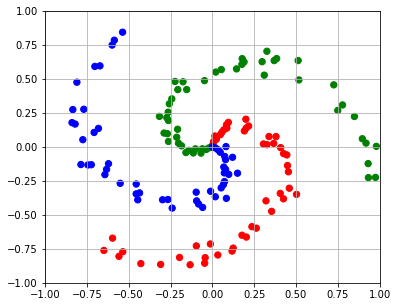

In [10]:
M = 3        # Number of category classes
K = 50       # Number of data points per class
N = M * K    # Number of entire data points
D = 3        # Dimensions inluding bias


# X[::,0] is bias
X, T = spiral(K, D, M)

# Y is colors as labels, instead of category indices.
Y = COLOR_LABELS[T]

fig, ax = plt.subplots(figsize=(6,5)) 
ax.scatter(X[:, 1], X[:, 2], c=Y, s=40)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.grid()

### Train on non-linear separable spiral data

In [11]:
MAX_TEST_TIMES = 500

W1 = weights.uniform(M, D)
W2 = weights.uniform(M, M)
optimizer = SGD(lr=0.3)

# W = train_classifier(
W1, W2 = train_two_layer_classifier(
    N=N,
    D=D,
    M=M,
    X=X,
    T=T,
    W1=W1,
    W2=W2,
    log_loss_function=softmax_cross_entropy_log_loss,
    optimizer=optimizer,
    num_epochs=MAX_TEST_TIMES,
    test_numerical_gradient=False
)

1.1157584061883297
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[0]. Loss is [1.1157584061883297]
1.0997056260358367
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[1]. Loss is [1.0997056260358367]
1.0862079111392318
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[2]. Loss is [1.0862079111392318]
1.074663082374562
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[3]. Loss is [1.074663082374562]
1.0647145324766742
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[4]. Loss is [1.0647145324766742]
1.0561261147540137
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[5]. Loss is [1.0561261147540137]
1.04863346378082
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[6]. Loss is [1.04863346378082

0.840399551537637
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[56]. Loss is [0.840399551537637]
0.8361982643782183
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[57]. Loss is [0.8361982643782183]
0.8321409726306531
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[58]. Loss is [0.8321409726306531]
0.8281214586115881
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[59]. Loss is [0.8281214586115881]
0.8241485133733698
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[60]. Loss is [0.8241485133733698]
0.8202237043591585
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[61]. Loss is [0.8202237043591585]
0.8163441670404412
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[62]. Loss is [0.81634

0.7174561280714002
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[113]. Loss is [0.7174561280714002]
0.7167637792990433
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[114]. Loss is [0.7167637792990433]
0.7160916909719149
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[115]. Loss is [0.7160916909719149]
0.7154391599841641
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[116]. Loss is [0.7154391599841641]
0.7148046081993594
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[117]. Loss is [0.7148046081993594]
0.7141863616621766
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[118]. Loss is [0.7141863616621766]
0.7135846623244734
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[119]. Loss is

0.6938493093482335
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[170]. Loss is [0.6938493093482335]
0.6935923383267193
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[171]. Loss is [0.6935923383267193]
0.6933305119201199
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[172]. Loss is [0.6933305119201199]
0.6930790201072131
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[173]. Loss is [0.6930790201072131]
0.6928237223265183
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[174]. Loss is [0.6928237223265183]
0.6925731029267881
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[175]. Loss is [0.6925731029267881]
0.6923278549860631
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[176]. Loss is

0.6801805696268077
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[227]. Loss is [0.6801805696268077]
0.6799625308034543
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[228]. Loss is [0.6799625308034543]
0.6797451028554294
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[229]. Loss is [0.6797451028554294]
0.6795287375796928
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[230]. Loss is [0.6795287375796928]
0.6793152734014398
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[231]. Loss is [0.6793152734014398]
0.6791011204053301
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[232]. Loss is [0.6791011204053301]
0.6788889169678263
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[233]. Loss is

0.668709122933175
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[284]. Loss is [0.668709122933175]
0.6685216185697843
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[285]. Loss is [0.6685216185697843]
0.668334588158404
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[286]. Loss is [0.668334588158404]
0.6681480324277275
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[287]. Loss is [0.6681480324277275]
0.6679619521691671
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[288]. Loss is [0.6679619521691671]
0.6677763482165426
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[289]. Loss is [0.6677763482165426]
0.6675912214310966
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[290]. Loss is [0.

0.6580945878858757
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[341]. Loss is [0.6580945878858757]
0.6579150791706809
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[342]. Loss is [0.6579150791706809]
0.6577365398583435
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[343]. Loss is [0.6577365398583435]
0.6575592349495618
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[344]. Loss is [0.6575592349495618]
0.6573833483267154
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[345]. Loss is [0.6573833483267154]
0.6572086603782911
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[346]. Loss is [0.6572086603782911]
0.6570348275727265
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[347]. Loss is

0.6491389498638513
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[398]. Loss is [0.6491389498638513]
0.648999942566476
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[399]. Loss is [0.648999942566476]
0.6488617387847905
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[400]. Loss is [0.6488617387847905]
0.6487240158558154
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[401]. Loss is [0.6487240158558154]
0.6485867692743031
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[402]. Loss is [0.6485867692743031]
0.6484499962462907
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[403]. Loss is [0.6484499962462907]
0.6483136944240141
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[404]. Loss is [

0.6435846770097009
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[441]. Loss is [0.6435846770097009]
0.6434649472241741
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[442]. Loss is [0.6434649472241741]
0.6433456230089409
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[443]. Loss is [0.6433456230089409]
0.6432267029339594
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[444]. Loss is [0.6432267029339594]
0.6431081855756945
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[445]. Loss is [0.6431081855756945]
0.6429900695169333
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[446]. Loss is [0.6429900695169333]
0.6428723533466085
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[447]. Loss is

0.6396263830531133
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[476]. Loss is [0.6396263830531133]
0.6395200327864937
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[477]. Loss is [0.6395200327864937]
0.6394140410853507
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[478]. Loss is [0.6394140410853507]
0.639308406681655
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[479]. Loss is [0.639308406681655]
0.6392031283109225
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[480]. Loss is [0.6392031283109225]
0.6390982047121877
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[481]. Loss is [0.6390982047121877]
0.6389936346279766
INFO:network.test_040_two_layer_classifier:network.test_040_two_layer_classifier: iteration[482]. Loss is [

In [12]:
Z = X@W1.T

### Plot predictions

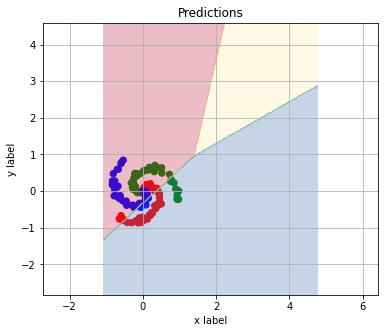

In [13]:
fig, ax = plt.subplots(figsize=(6,5)) 
for i in range(2):
    ax.set_xlabel('x label')
    ax.set_ylabel('y label')
    ax.axis('equal')
    ax.grid()

ax.set_title("Predictions")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

x_grid, y_grid, predictions = prediction_grid(Z, W2)
plot_categorical_predictions(ax, [x_grid, y_grid], X, Y, predictions)

## A NOT B

In [ ]:
from data import (
    set_in_a_radius,
    set_in_A_not_B,
    sets_of_circle_A_not_B
)

In [ ]:
M = 3
N = 300
radius = 1
circles, centres = sets_of_circle_A_not_B(radius=radius, ratio=1.2, m=M, n=N)

fig, ax = plt.subplots(figsize=(8,6)) 
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.axis('equal')
ax.grid()
r = np.linspace(0, 2*np.pi, 100)

for i in range(M):
    circle = circles[i]
    if circle.size > 0:
        x = centres[i][0]
        y = centres[i][1]
        ax.scatter(circle[::, 0], circle[::, 1], color=COLOR_LABELS[i])
        ax.plot(
            x + radius * np.cos(r), 
            y + radius * np.sin(r), 
            linestyle='dashed', 
            color=COLOR_LABELS[i]
        )

